# Split Operator Method

### Category: Prerequisites

### Prerequisites: Quantum Mechanics


\begin{equation}
| \Psi_0 \rangle = \frac{1}{\sqrt{2}} \left(| 1 \rangle + | 2 \rangle \right)
\end{equation}
\begin{equation}
 e^{-i \omega_1 t} | 1 \rangle + e^{-i \omega_2 t} | 2 \rangle
\end{equation}
\begin{equation}
e^{-i (\omega_1 -\omega_2 ) t} | 1 \rangle + e^{
\end{equation}

In [1]:
using PyPlot

In [77]:
function GenerateHermite(n)
    Hermite=Function[]

    push!(Hermite,x->1);
    push!(Hermite,x->2*x);

    for ni in 3:n
        push!(Hermite,x->2.*x.*Hermite[ni-1](x).-2.*n.*Hermite[ni-2](x))
    end
    return Hermite
end

Hermite=GenerateHermite(2)

m=1
ω=1
ħ=1

Ψ(n,x)=1/sqrt(factorial(n)*2^n)*(m*ω/(ħ*π))^(1/4)*   exp(-m*ω*x.^2/(2*ħ)).*Hermite[n](sqrt(m*ω/ħ)*x)

Ψ (generic function with 1 method)

(Any) in module Main at In[71]:2 overwritten at In[77]:2.


In [361]:
t0=0
tf=1
dt=.0001

0.0001

In [3]:
t=collect(t0:dt:tf);

In [439]:
x=collect(-20:.1:20);

In [390]:
length(k)

401

In [391]:
N=length(x);
k = [ collect(0:((N-1)/2)) ; collect(-(N-1)/2:-1) ] *2*π/(N*.1);

In [375]:
maximum(k), pi/.1

(31.337582579449307,31.41592653589793)

In [450]:
V[1:200]=.5*(x[1:200]+2).^2
V[201:401]=.5*(x[201:401]-2).^2;

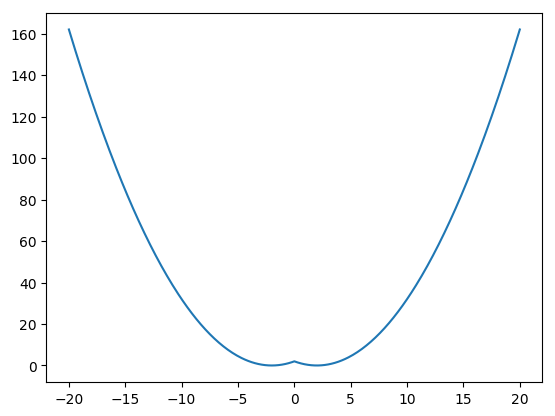

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000002A6C37630>

In [451]:
plot(x,V)

In [453]:
Ψ1=Ψ(1,x+2)/sqrt(5)
Ψ2=Ψ(1,x-2)/sqrt(5)
#Psi0=convert(Array{Complex{Float64},1},1/sqrt(2)*(Ψ1+Ψ2));
Psi0=convert(Array{Complex{Float64},1},Ψ1);
Psi=Psi0;

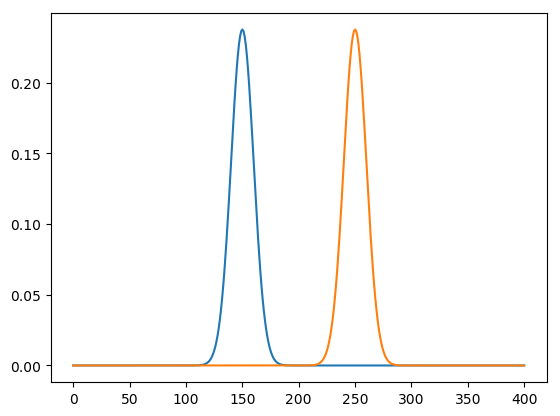

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007275EEF0>

In [445]:
plot(Ψ1)
plot(Ψ2)

In [458]:
Ux=exp(-im*V*.01/2);
Uf=exp(-im*k.^2/2*.01);

In [459]:
nt=10000
overlap=zeros(Complex{Float64},nt,2);
nm=zeros(Float64,nt);
ang=zeros(Float64,N,nt);
E=zeros(Float64,nt);

In [460]:
Psi0=convert(Array{Complex{Float64},1},Ψ1);
Psi=Psi0
for ii in 1:nt
    Psi=Psi.*Ux
    Psif=fft(Psi)
    Psif=Psif.*Uf
    
    Psi=ifft(Psif)
    Psi=Psi.*Ux
    
    nm[ii]=sum(Psi.*conj(Psi));
    overlap[ii,1]=sum(conj(Psi).*Ψ1)
    overlap[ii,2]=sum(conj(Psi).*Ψ2)
    ang[:,ii]=angle(Ψ1.*Psi)
    

end

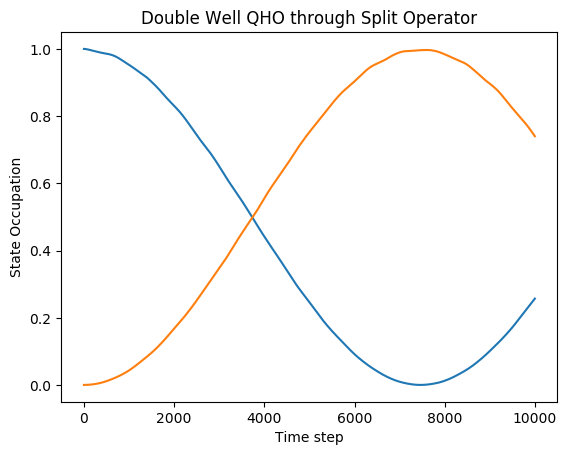

PyObject <matplotlib.text.Text object at 0x00000002A991CD68>

In [464]:
plot(abs(overlap).^2)
xlabel("Time step")
ylabel("State Occupation")
title("Double Well QHO through Split Operator")

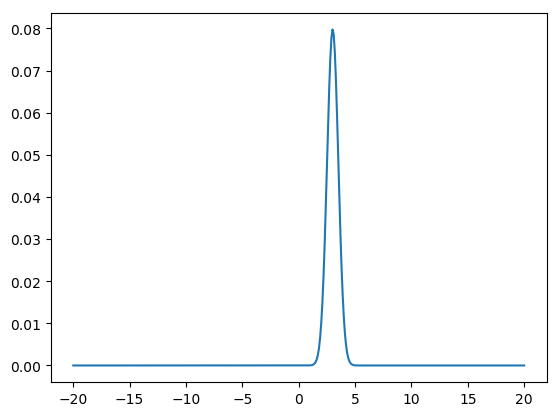

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000071492470>

In [430]:
plot(x,abs(Psi).^2)

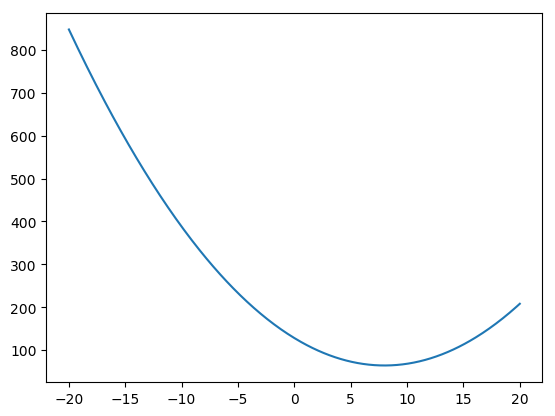

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000071CBBE80>

In [434]:
plot(x,V)